# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.11.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Please set verbose=2 to see the detailed citation list.




### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
330555,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330556,2020-11-12,857,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330557,2020-11-13,858,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330558,2020-11-14,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330559,2020-11-15,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
330555,2020-11-11,Colombia,Vichada,856,17,11,828
330556,2020-11-12,Colombia,Vichada,857,15,11,831
330557,2020-11-13,Colombia,Vichada,858,15,11,832
330558,2020-11-14,Colombia,Vichada,858,14,11,833
330559,2020-11-15,Colombia,Vichada,858,14,11,833


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
237,2020-11-11,33377,2449,468,30460
238,2020-11-12,33770,2617,470,30683
239,2020-11-13,34144,2720,470,30954
240,2020-11-14,34496,2841,470,31185
241,2020-11-15,34751,3096,470,31185


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-11-11,52189961,17040339,1289010,33860612,0.012349,0.324398,0.036672
2020-11-12,52826057,17426339,1298417,34101301,0.012290,0.322770,0.036679
2020-11-13,53447743,17753213,1307501,34387029,0.012232,0.321688,0.036630
2020-11-14,54006925,18048125,1315893,34642907,0.012183,0.320727,0.036594
2020-11-15,54007964,18151124,1315898,34540942,0.012182,0.319776,0.036699


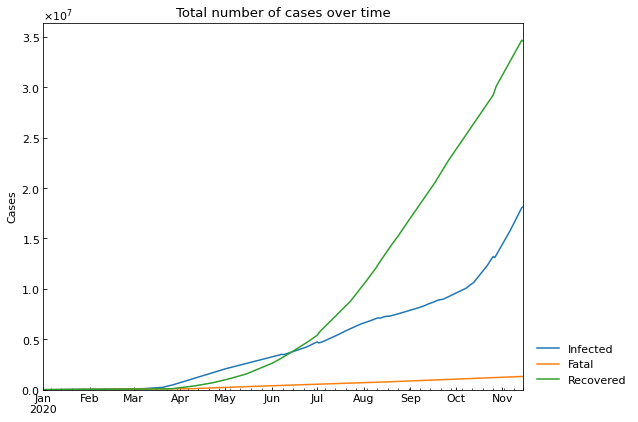

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
276,2020-11-11,112049,11104,1862,99083
277,2020-11-12,113711,11857,1872,99982
278,2020-11-13,115413,12534,1884,100995
279,2020-11-14,117150,13298,1887,101965
280,2020-11-15,118189,116297,1892,100616


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
274,2020-11-11,110156,9207,1841,99108
275,2020-11-12,111711,9855,1851,100005
276,2020-11-13,113298,10413,1867,101018
277,2020-11-14,114983,11114,1880,101989
278,2020-11-15,116677,11957,1883,102837


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
330555,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330556,2020-11-12,857,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330557,2020-11-13,858,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330558,2020-11-14,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330559,2020-11-15,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
278715,COL,Colombia,Vichada,2020-11-11,107808
278716,COL,Colombia,Vichada,2020-11-12,107808
278717,COL,Colombia,Vichada,2020-11-13,107808
278718,COL,Colombia,Vichada,2020-11-14,107808
278719,COL,Colombia,Vichada,2020-11-15,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
330555,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330556,2020-11-12,857,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330557,2020-11-13,858,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330558,2020-11-14,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
330559,2020-11-15,858,833,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
330555,2020-11-11,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
330556,2020-11-12,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
330557,2020-11-13,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
330558,2020-11-14,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
330559,2020-11-15,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
315,2020-11-11,1,1,1,0,0,1,1,3,2,2,1,38.89
316,2020-11-12,1,1,1,0,0,1,1,3,2,2,1,38.89
317,2020-11-13,1,1,1,0,0,1,1,3,2,2,1,38.89
318,2020-11-14,1,1,1,0,0,1,1,3,2,2,1,38.89
319,2020-11-15,1,1,1,0,0,1,1,3,2,2,1,38.89


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
315,2020-11-11,1,1,1,0,0,1,1,3,2,2,1,38.89
316,2020-11-12,1,1,1,0,0,1,1,3,2,2,1,38.89
317,2020-11-13,1,1,1,0,0,1,1,3,2,2,1,38.89
318,2020-11-14,1,1,1,0,0,1,1,3,2,2,1,38.89
319,2020-11-15,1,1,1,0,0,1,1,3,2,2,1,38.89


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

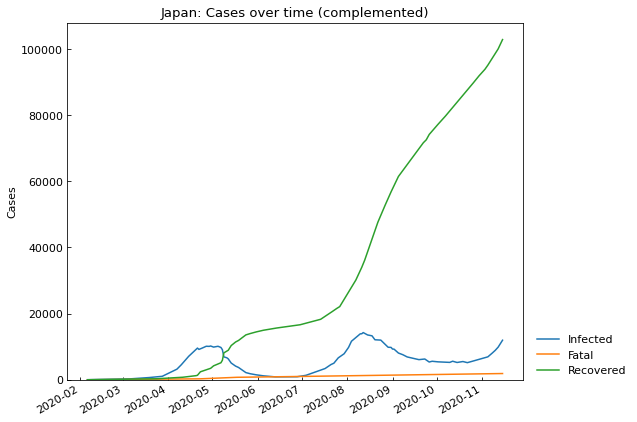

,Date,Confirmed,Infected,Fatal,Recovered
274,2020-11-11,110156,9207,1841,99108
275,2020-11-12,111711,9855,1851,100005
276,2020-11-13,113298,10413,1867,101018
277,2020-11-14,114983,11114,1880,101989
278,2020-11-15,116677,11957,1883,102837


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

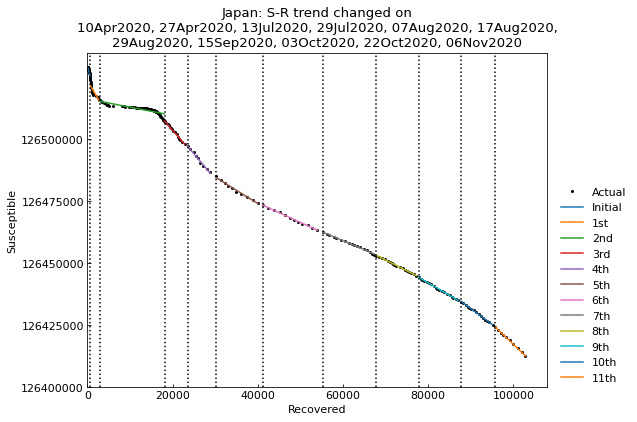

,Type,Start,End,Population
0th,Past,06Feb2020,09Apr2020,126529100
1st,Past,10Apr2020,26Apr2020,126529100
2nd,Past,27Apr2020,12Jul2020,126529100
3rd,Past,13Jul2020,28Jul2020,126529100
4th,Past,29Jul2020,06Aug2020,126529100
5th,Past,07Aug2020,16Aug2020,126529100
6th,Past,17Aug2020,28Aug2020,126529100
7th,Past,29Aug2020,14Sep2020,126529100
8th,Past,15Sep2020,02Oct2020,126529100
9th,Past,03Oct2020,21Oct2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (06Nov2020 - 15Nov2020): finished 3616 trials in 3 min  0 sec


	 3rd phase (13Jul2020 - 28Jul2020): finished  668 trials in 0 min 20 sec

	 1st phase (10Apr2020 - 26Apr2020): finished 3576 trials in 3 min  0 sec

	 0th phase (06Feb2020 - 09Apr2020): finished 3527 trials in 3 min  0 sec

	 2nd phase (27Apr2020 - 12Jul2020): finished 3526 trials in 3 min  0 sec

	 7th phase (29Aug2020 - 14Sep2020): finished  371 trials in 0 min 10 sec

	 5th phase (07Aug2020 - 16Aug2020): finished  689 trials in 0 min 20 sec

	 4th phase (29Jul2020 - 06Aug2020): finished 3559 trials in 3 min  0 sec

	 6th phase (17Aug2020 - 28Aug2020): finished  681 trials in 0 min 20 sec

	 8th phase (15Sep2020 - 02Oct2020): finished  366 trials in 0 min 10 sec

	10th phase (22Oct2020 - 05Nov2020): finished  388 trials in 0 min 10 sec

	 9th phase (03Oct2020 - 21Oct2020): finished 3962 trials in 3 min  0 sec

Completed optimization. Total: 9 min 23 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,09Apr2020,126529100,SIR-F,4.28,0.017911,0.000559,0.108940,0.024419,1440,40,1788,0.018,9,0.240167,3527,3 min 0 sec
1st,Past,10Apr2020,26Apr2020,126529100,SIR-F,5.11,0.017055,0.000677,0.068628,0.012515,1440,79,1477,0.017,14,0.152497,3576,3 min 0 sec
2nd,Past,27Apr2020,12Jul2020,126529100,SIR-F,0.33,0.116556,0.000098,0.021582,0.057165,1440,17,10214,0.117,46,0.321723,3526,3 min 0 sec
3rd,Past,13Jul2020,28Jul2020,126529100,SIR-F,1.99,0.000157,0.000060,0.125734,0.063118,1440,15,16706,0.000,7,0.023577,668,0 min 20 sec
4th,Past,29Jul2020,06Aug2020,126529100,SIR-F,2.06,0.000528,0.000170,0.138295,0.067074,1440,14,5883,0.001,7,0.017594,3559,3 min 0 sec
5th,Past,07Aug2020,16Aug2020,126529100,SIR-F,1.20,0.000804,0.000432,0.095261,0.079190,1440,12,2313,0.001,10,0.023315,689,0 min 20 sec
6th,Past,17Aug2020,28Aug2020,126529100,SIR-F,0.79,0.000315,0.000951,0.079902,0.100230,1440,9,1051,0.000,12,0.013234,681,0 min 20 sec
7th,Past,29Aug2020,14Sep2020,126529100,SIR-F,0.73,0.017418,0.000327,0.068374,0.091493,1440,10,3059,0.017,14,0.016382,371,0 min 10 sec
8th,Past,15Sep2020,02Oct2020,126529100,SIR-F,0.87,0.000193,0.001444,0.084743,0.096086,1440,10,692,0.000,11,0.020845,366,0 min 10 sec
9th,Past,03Oct2020,21Oct2020,126529100,SIR-F,1.00,0.000346,0.000852,0.096120,0.095364,1440,10,1173,0.000,10,0.013070,3962,3 min 0 sec


### Accuracy of estimation

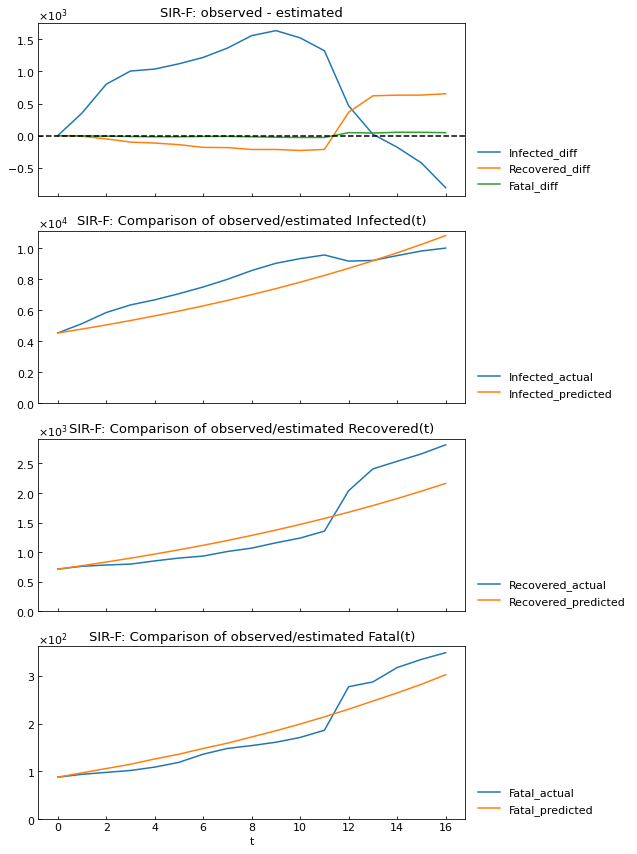

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

2.06

### Show parameter history

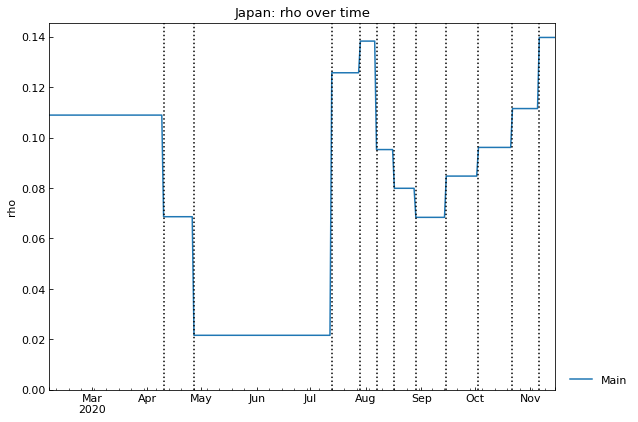

In [32]:
_ = snl.history(target="rho")

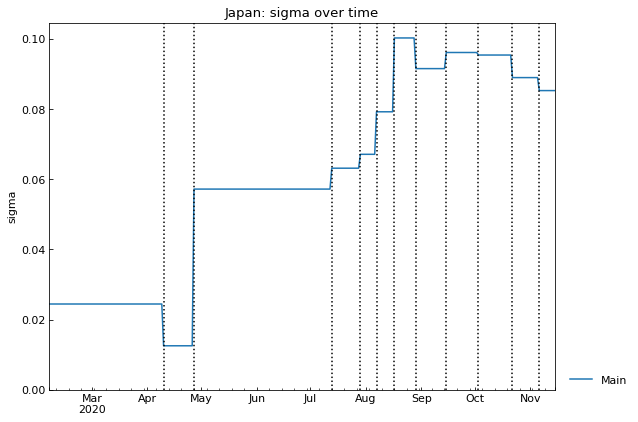

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

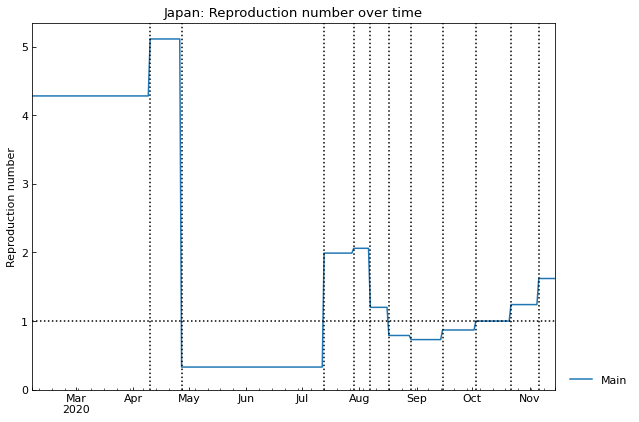

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

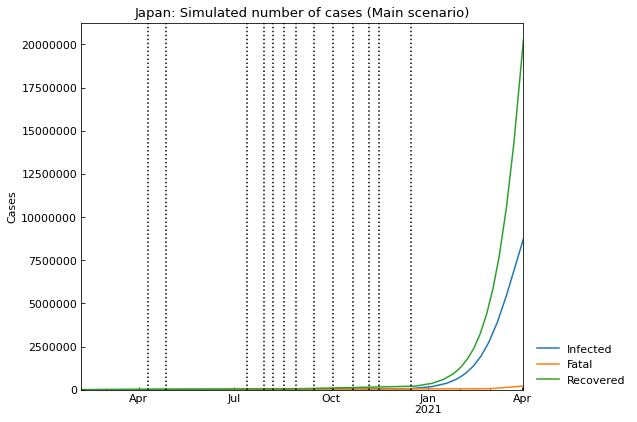

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,25535513,192970,7929324,17413219
418,2021-03-30,26427913,200503,8130890,18096520
419,2021-03-31,27334086,208224,8328919,18796943
420,2021-04-01,28253130,216132,8522667,19514331
421,2021-04-02,29184080,224224,8711356,20248500


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.08523240400387383

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.17046480800774766

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  09Apr2020   126529100  SIR-F  4.28   
         1st      Past  10Apr2020  26Apr2020   126529100  SIR-F  5.11   
         2nd      Past  27Apr2020  12Jul2020   126529100  SIR-F  0.33   
         3rd      Past  13Jul2020  28Jul2020   126529100  SIR-F  1.99   
         4th      Past  29Jul2020  06Aug2020   126529100  SIR-F  2.06   
         5th      Past  07Aug2020  16Aug2020   126529100  SIR-F  1.20   
         6th      Past  17Aug2020  28Aug2020   126529100  SIR-F  0.79   
         7th      Past  29Aug2020  14Sep2020   126529100  SIR-F  0.73   
         8th      Past  15Sep2020  02Oct2020   126529100  SIR-F  0.87   
         9th      Past  03Oct2020  21Oct2020   126529100  SIR-F  1.00   
         10th     Past  22Oct2020  05Nov2020   126529100  SIR-F  1.24   
         11th     Past  06Nov2020  15Nov2020   126529100  SIR-F  1.62   
         12th   Future  16Nov2020  15Dec2020   126529100  SIR-F  1.62   
         13th   Future  16Dec2020  01Apr2021   126529100  SIR-F  1.62   
Medicine 0th      Past  06Feb2020  09Apr2020   126529100  SIR-F  4.28   
         1st      Past  10Apr2020  26Apr2020   126529100  SIR-F  5.11   
         2nd      Past  27Apr2020  12Jul2020   126529100  SIR-F  0.33   
         3rd      Past  13Jul2020  28Jul2020   126529100  SIR-F  1.99   
         4th      Past  29Jul2020  06Aug2020   126529100  SIR-F  2.06   
         5th      Past  07Aug2020  16Aug2020   126529100  SIR-F  1.20   
         6th      Past  17Aug2020  28Aug2020   126529100  SIR-F  0.79   
         7th      Past  29Aug2020  14Sep2020   126529100  SIR-F  0.73   
         8th      Past  15Sep2020  02Oct2020   126529100  SIR-F  0.87   
         9th      Past  03Oct2020  21Oct2020   126529100  SIR-F  1.00   
         10th     Past  22Oct2020  05Nov2020   126529100  SIR-F  1.24   
         11th     Past  06Nov2020  15Nov2020   126529100  SIR-F  1.62   
         12th   Future  16Nov2020  15Dec2020   126529100  SIR-F  1.62   
         13th   Future  16Dec2020  01Apr2021   126529100  SIR-F  0.82   

                   theta     kappa       rho     sigma   tau  1/gamma [day]  \
Scenario Phase                                                                
Main     0th    0.017911  0.000559  0.108940  0.024419  1440             40   
         1st    0.017055  0.000677  0.068628  0.012515  1440             79   
         2nd    0.116556  0.000098  0.021582  0.057165  1440             17   
         3rd    0.000157  0.000060  0.125734  0.063118  1440             15   
         4th    0.000528  0.000170  0.138295  0.067074  1440             14   
         5th    0.000804  0.000432  0.095261  0.079190  1440             12   
         6th    0.000315  0.000951  0.079902  0.100230  1440              9   
         7th    0.017418  0.000327  0.068374  0.091493  1440             10   
         8th    0.000193  0.001444  0.084743  0.096086  1440             10   
         9th    0.000346  0.000852  0.096120  0.095364  1440             10   
         10th   0.001958  0.000976  0.111530  0.088933  1440             11   
         11th   0.000085  0.000930  0.139743  0.085232  1440             11   
         12th   0.000085  0.000930  0.139743  0.085232  1440             11   
         13th   0.000085  0.000930  0.139743  0.085232  1440             11   
Medicine 0th    0.017911  0.000559  0.108940  0.024419  1440             40   
         1st    0.017055  0.000677  0.068628  0.012515  1440             79   
         2nd    0.116556  0.000098  0.021582  0.057165  1440             17   
         3rd    0.000157  0.000060  0.125734  0.063118  1440             15   
         4th    0.000528  0.000170  0.138295  0.067074  1440             14   
         5th    0.000804  0.000432  0.095261  0.079190  1440             12   
         6th    0.000315  0.000951  0.079902  0.100230  1440              9   
         7

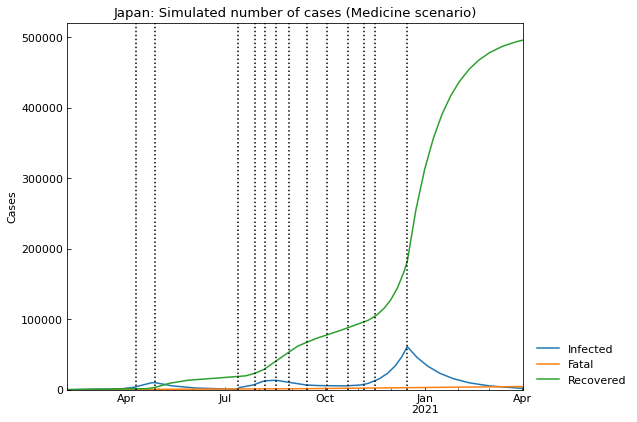

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,501493,4486,2235,494772
418,2021-03-30,501799,4489,2164,495146
419,2021-03-31,502096,4491,2096,495509
420,2021-04-01,502381,4492,2029,495860
421,2021-04-02,502659,4494,1965,496200


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,8711356,02Apr2021,29184080,8711356,224224,1.62
Medicine,61123,16Dec2020,502659,1965,4494,0.82


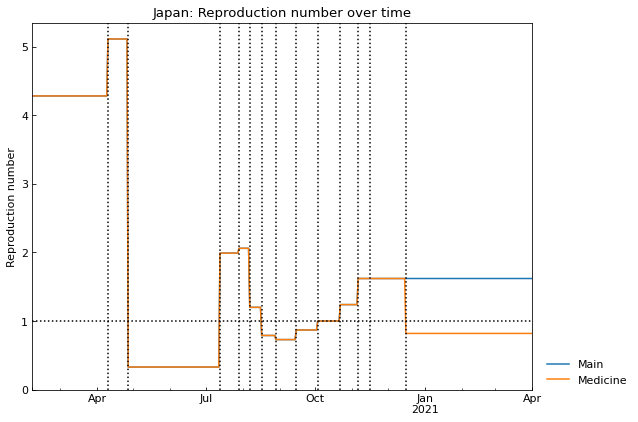

In [41]:
_ = snl.history(target="Rt")

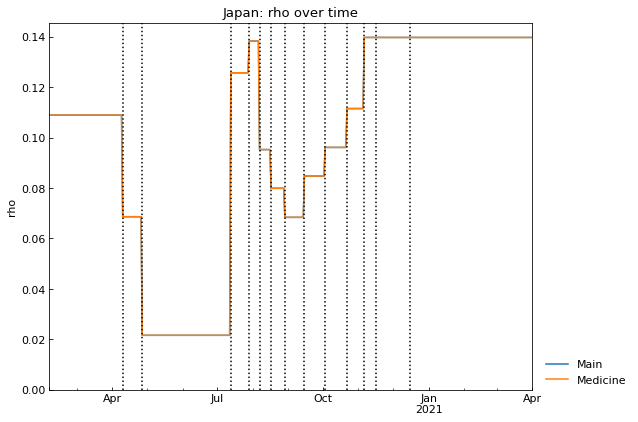

In [42]:
_ = snl.history(target="rho")

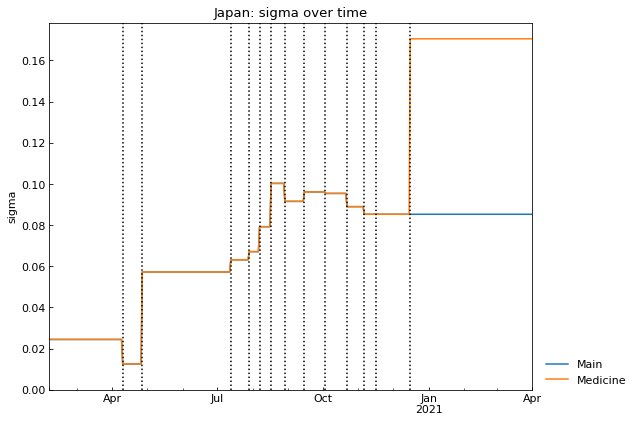

In [43]:
_ = snl.history(target="sigma")

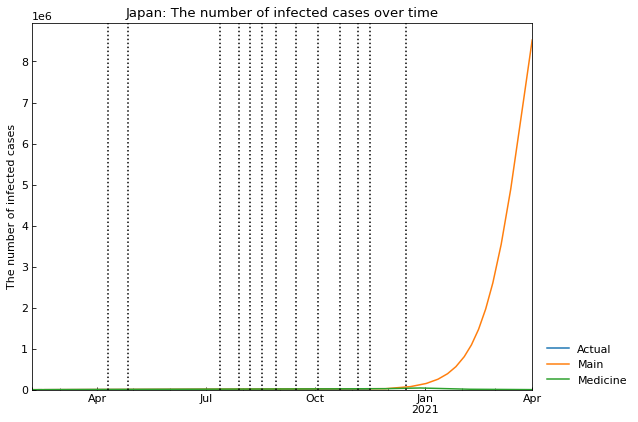

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

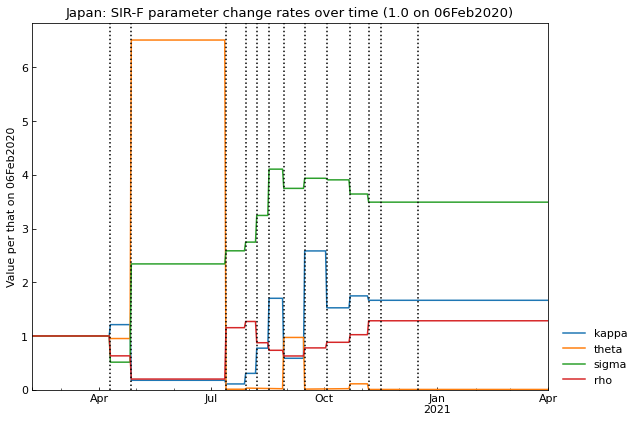

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (06Nov2020 - 15Nov2020): finished  906 trials in 0 min 30 sec


	 3rd phase (13Jul2020 - 28Jul2020): finished  690 trials in 0 min 20 sec

	 1st phase (10Apr2020 - 26Apr2020): finished 3478 trials in 3 min  0 sec

	 2nd phase (27Apr2020 - 12Jul2020): finished 3440 trials in 3 min  0 sec

	 0th phase (06Feb2020 - 09Apr2020): finished 3450 trials in 3 min  0 sec

	 7th phase (29Aug2020 - 31Aug2020): finished  347 trials in 0 min 10 sec

	 5th phase (07Aug2020 - 16Aug2020): finished  664 trials in 0 min 20 sec

	 4th phase (29Jul2020 - 06Aug2020): finished 3460 trials in 3 min  0 sec

	 6th phase (17Aug2020 - 28Aug2020): finished  662 trials in 0 min 20 sec

	 8th phase (01Sep2020 - 14Sep2020): finished  356 trials in 0 min 10 sec

	 9th phase (15Sep2020 - 02Oct2020): finished  380 trials in 0 min 10 sec

	11th phase (22Oct2020 - 05Nov2020): finished  382 trials in 0 min 10 sec

	10th phase (03Oct2020 - 21Oct2020): finished 3886 trials in 3 min  0 sec

Completed optimization. Total: 6 min 52 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 8th phase (01Sep2020 - 15Nov2020): finished 11247 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  09Apr2020  SIR-F  4.28  0.017911  0.000559   
              1st    10Apr2020  26Apr2020  SIR-F  5.11  0.017055  0.000677   
              2nd    27Apr2020  12Jul2020  SIR-F  0.33  0.116556  0.000098   
              3rd    13Jul2020  28Jul2020  SIR-F  2.02  0.000966  0.000117   
              4th    29Jul2020  06Aug2020  SIR-F  2.06  0.000528  0.000170   
              5th    07Aug2020  16Aug2020  SIR-F  1.20  0.000804  0.000432   
              6th    17Aug2020  28Aug2020  SIR-F  0.79  0.000315  0.000951   
              7th    29Aug2020  31Aug2020  SIR-F  0.94  0.000977  0.001045   
              8th    01Sep2020  14Sep2020  SIR-F  0.72  0.016967  0.000190   
              9th    15Sep2020  02Oct2020  SIR-F  0.87  0.000193  0.001444   
              10th   03Oct2020  21Oct2020  SIR-F  1.00  0.000346  0.000852   
              11th   22Oct2020  05Nov2020  SIR-F  1.24  0.001958  0.000976   
              12th   06Nov2020  15Nov2020  SIR-F  1.63  0.000047  0.000858   
Retrospective 0th    06Feb2020  09Apr2020  SIR-F  4.28  0.017911  0.000559   
              1st    10Apr2020  26Apr2020  SIR-F  5.11  0.017055  0.000677   
              2nd    27Apr2020  12Jul2020  SIR-F  0.33  0.116556  0.000098   
              3rd    13Jul2020  28Jul2020  SIR-F  2.02  0.000966  0.000117   
              4th    29Jul2020  06Aug2020  SIR-F  2.06  0.000528  0.000170   
              5th    07Aug2020  16Aug2020  SIR-F  1.20  0.000804  0.000432   
              6th    17Aug2020  28Aug2020  SIR-F  0.79  0.000315  0.000951   
              7th    29Aug2020  31Aug2020  SIR-F  0.94  0.000977  0.001045   
              8th    01Sep2020  15Nov2020  SIR-F  0.94  0.000977  0.001045   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.108940  0.024419  0.240167    3450  3 min  0 sec  
              1st    0.068628  0.012515  0.152497    3478  3 min  0 sec  
              2nd    0.021582  0.057165  0.321723    3440  3 min  0 sec  
              3rd    0.125673  0.062152  0.023377     690  0 min 20 sec  
              4th    0.138295  0.067074  0.017594    3460  3 min  0 sec  
              5th    0.095261  0.079190  0.023315     664  0 min 20 sec  
              6th    0.079902  0.100230  0.013234     662  0 min 20 sec  
              7th    0.070793  0.074584  0.002829     347  0 min 10 sec  
              8th    0.069987  0.095390  0.016036     356  0 min 10 sec  
              9th    0.084743  0.096086  0.020845     380  0 min 10 sec  
              10th   0.096120  0.095364  0.013070    3886  3 min  0 sec  
              11th   0.111530  0.088933  0.012025     382  0 min 10 sec  
              12th   0.139779  0.084679  0.007823     906  0 min 30 sec  
Retrospective 0th    0.108940  0.024419  0.240167    3450  3 min  0 sec  
              1st    0.068628  0.012515  0.152497    3478  3 min  0 sec  
              2nd    0.021582  0.057165  0.321723    3440  3 min  0 sec  
              3rd    0.125673  0.062152  0.023377     690  0 min 20 sec  
              4th    0.138295  0.067074  0.017594    3460  3 min  0 sec  
              5th    0.095261  0.079190  0.023315     664  0 min 20 sec  
              6th    0.079902  0.100230  0.013234     662  0 min 20 sec  
              7th    0.070793  0.074584  0.002829     347  0 min 10 sec  
              8th    0.070793  0.074584  0.174579   11247  3 min  0 sec

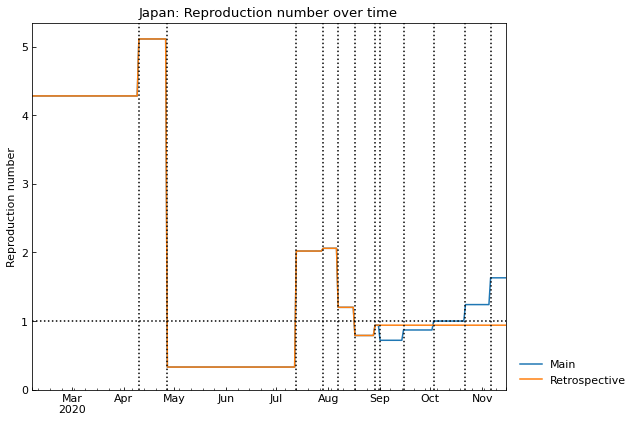

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

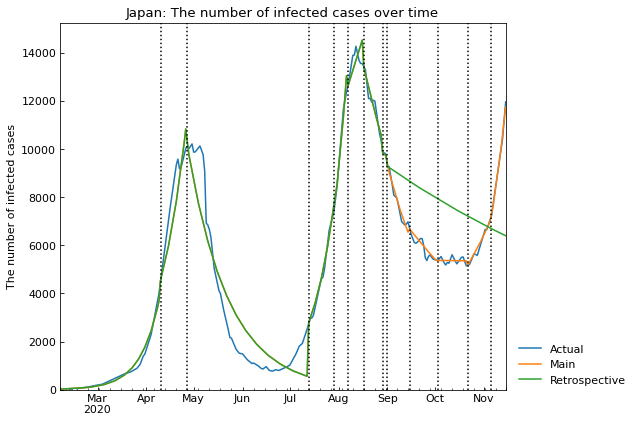

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 16Nov2020,Infected on 16Nov2020,Fatal on 16Nov2020,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,14523,16Aug2020,118161,12404,1889,0.72,0.87,1,1.24,1.63
Retrospective,14523,16Aug2020,109940,6363,1950,0.94,-,-,-,-
